In [1]:
import os
import sys
import numpy as np

import matplotlib.pyplot as plt

Get list of files for data

In [2]:
data_location = os.path.join('D:\Ansys_Sims\data', 'sensitivity_data')

data_files = []
data_files += [os.path.join(data_location, each) for each in os.listdir(data_location) if each.endswith('.out')]
print(data_files)

Retrieve the data with an array of arrays for each parameter that's important.

In this case, it's Drag, Lift, and Moment

In [3]:
iteration = []
drag = []
lift = []
moment = []

for idx, file in enumerate(data_files):
    iteration.append(np.loadtxt(file, skiprows=3, usecols=1))
    drag.append(np.loadtxt(file, skiprows=3, usecols=2))
    lift.append(np.loadtxt(file, skiprows=3, usecols=3))
    moment.append(np.loadtxt(file, skiprows=3, usecols=4))

In [4]:
data_location = os.path.join('D:\Ansys_Sims\data', 'improved_sensitivity_data')

data_files = []
data_files += [os.path.join(data_location, each) for each in os.listdir(data_location) if each.endswith('.out')]
print(data_files)

['D:\\Ansys_Sims\\data\\improved_sensitivity_data\\mesh1Improved.out', 'D:\\Ansys_Sims\\data\\improved_sensitivity_data\\mesh2Improved.out', 'D:\\Ansys_Sims\\data\\improved_sensitivity_data\\mesh3Improved.out', 'D:\\Ansys_Sims\\data\\improved_sensitivity_data\\Mesh4Improved.out', 'D:\\Ansys_Sims\\data\\improved_sensitivity_data\\Mesh5Improved.out']


Retrieve the data with an array of arrays for each parameter that's important.

In this case, it's Drag, Lift, and Moment

In [5]:
Iiteration = []
Idrag = []
Ilift = []
Imoment = []

for idx, file in enumerate(data_files):
    Iiteration.append(np.loadtxt(file, skiprows=3, usecols=1))
    Idrag.append(np.loadtxt(file, skiprows=3, usecols=2))
    Ilift.append(np.loadtxt(file, skiprows=3, usecols=3))
    Imoment.append(np.loadtxt(file, skiprows=3, usecols=4))

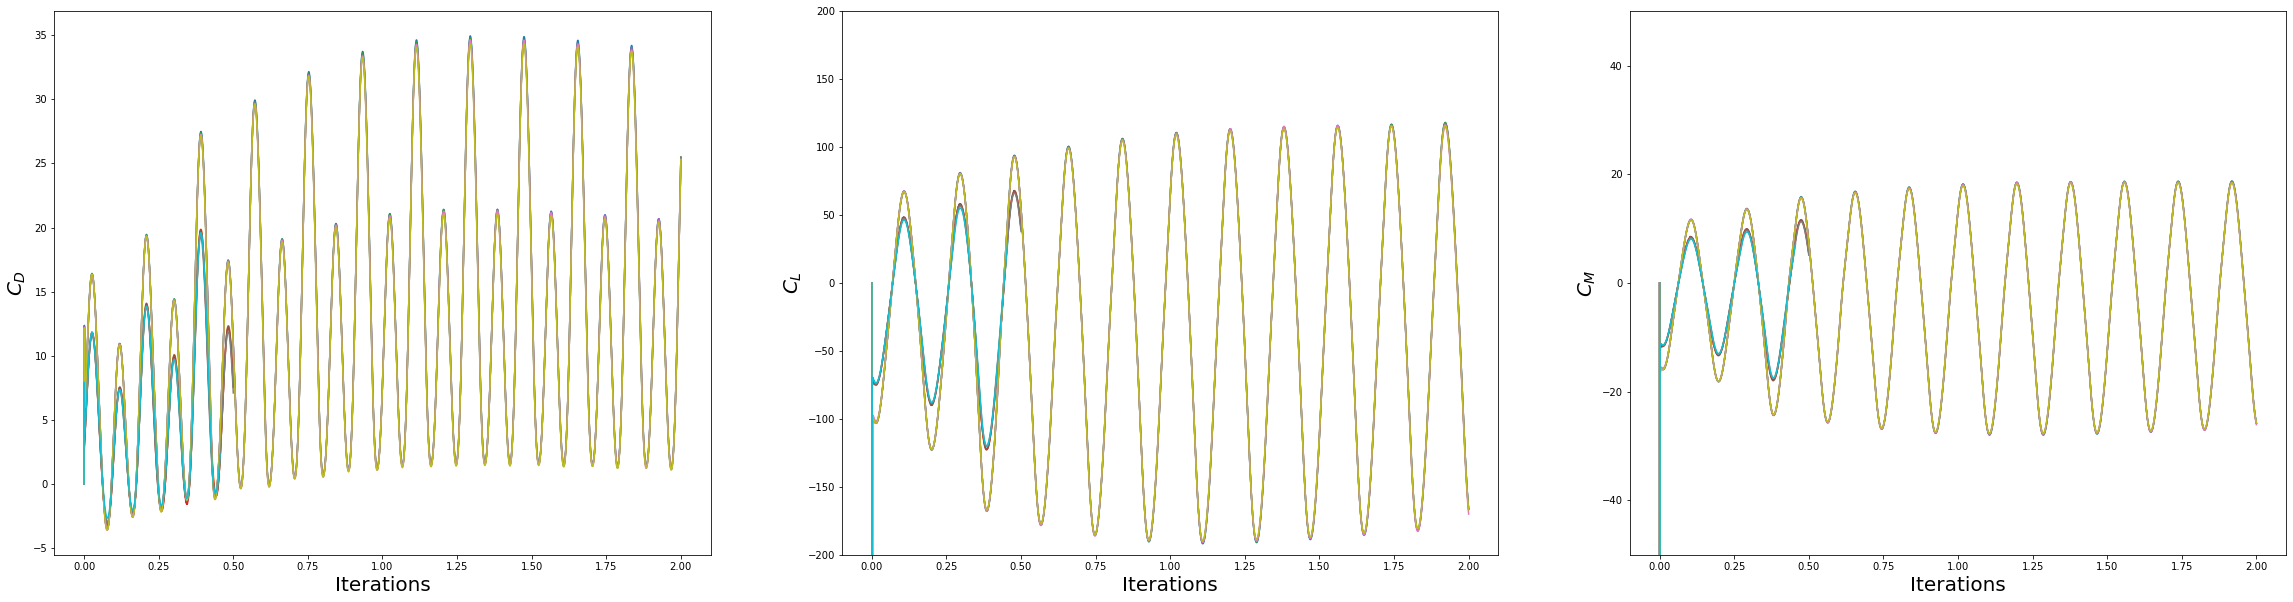

In [6]:
# plot the data
width = 40
nrows = int(np.ceil(len(data_files)))
fig, axs = plt.subplots(1, 3, figsize=(width,10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .05)

axs = axs.ravel()

for idx, file in enumerate(data_files):
    axs[0].plot(iteration[idx], drag[idx])
    axs[0].plot(Iiteration[idx], Idrag[idx])
    axs[0].set_xlabel('Iterations', fontsize=20.0)
    axs[0].set_ylabel('$C_D$', fontsize=20.0)
    axs[1].plot(iteration[idx], lift[idx])
    axs[1].plot(Iiteration[idx], Ilift[idx])
    axs[1].set_xlabel('Iterations', fontsize=20.0)
    axs[1].set_ylabel('$C_L$', fontsize=20.0)
    axs[1].set_ylim([-200, 200])
    axs[2].plot(iteration[idx], moment[idx])
    axs[2].plot(Iiteration[idx], Imoment[idx])
    axs[2].set_xlabel('Iterations', fontsize=20.0)
    axs[2].set_ylabel('$C_M$', fontsize=20.0)
    axs[2].set_ylim([-50, 50])

plt.savefig('raw_data_convergence_study.png', bbox_inches = 'tight')

In [7]:
elements = [85376, 121913, 202080, 429194, 738231, 1630432]
iterator = np.arange(0, len(elements), 1)
avg_drag = []
avg_lift = []
avg_moment = []

for idx, CL, CD, CM in zip(iterator, lift, drag, moment):
    avg_drag.append(np.mean(CD[100::]))
    avg_lift.append(np.mean(CL[100::]))
    avg_moment.append(np.mean(CM[100::]))

error_drag = [(np.abs(avg_drag[i + 1] - avg_drag[i]))/avg_drag[i]*100 for i in range(len(avg_lift)-1)]
error_lift = [(np.abs(avg_lift[i + 1] - avg_lift[i]))/avg_lift[i]*100 for i in range(len(avg_lift)-1)]
error_moment = [(np.abs(avg_moment[i + 1] - avg_moment[i]))/avg_moment[i]*100 for i in range(len(avg_moment)-1)]
print(error_drag, error_lift, error_moment)

[0.12684555478888454, 0.20625045675574444, 0.2410749330006, 1.0207347697824305, 1.5831851745506968] [-0.9975238924880818, -0.10565248816765717, -0.3147551855848794, -0.6352644983968567, -32.0802318670265] [-1.625639806417715, -0.5166219212664219, -0.06328917406346032, -0.2224983098149267, -32.93059643431561]


In [8]:
Ielements = [59834, 75394, 96800, 143590, 485634]
Iiterator = np.arange(0, len(elements), 1)
Iavg_drag = []
Iavg_lift = []
Iavg_moment = []

for idx, CL, CD, CM in zip(Iiterator, Ilift, Idrag, Imoment):
    Iavg_drag.append(np.mean(CD[100::]))
    Iavg_lift.append(np.mean(CL[100::]))
    Iavg_moment.append(np.mean(CM[100::]))

Ierror_drag = [(np.abs(Iavg_drag[i + 1] - Iavg_drag[i]))/Iavg_drag[i]*100 for i in range(len(Iavg_lift)-1)]
Ierror_lift = [(np.abs(Iavg_lift[i + 1] - Iavg_lift[i]))/Iavg_lift[i]*100 for i in range(len(Iavg_lift)-1)]
Ierror_moment = [(np.abs(Iavg_moment[i + 1] - Iavg_moment[i]))/Iavg_moment[i]*100 for i in range(len(Iavg_moment)-1)]
print(Ierror_drag, Ierror_lift, Ierror_moment)

[2.759445996728762, 0.7879615797833217, 2.526828330585681, 2.1369071215974653] [-0.4295505258378663, -0.9318549534230096, -1.4731262381849197, -42.99206266582428] [-0.1913825267706558, -1.5059576502499914, -1.1130484677498864, -69.8530264449996]


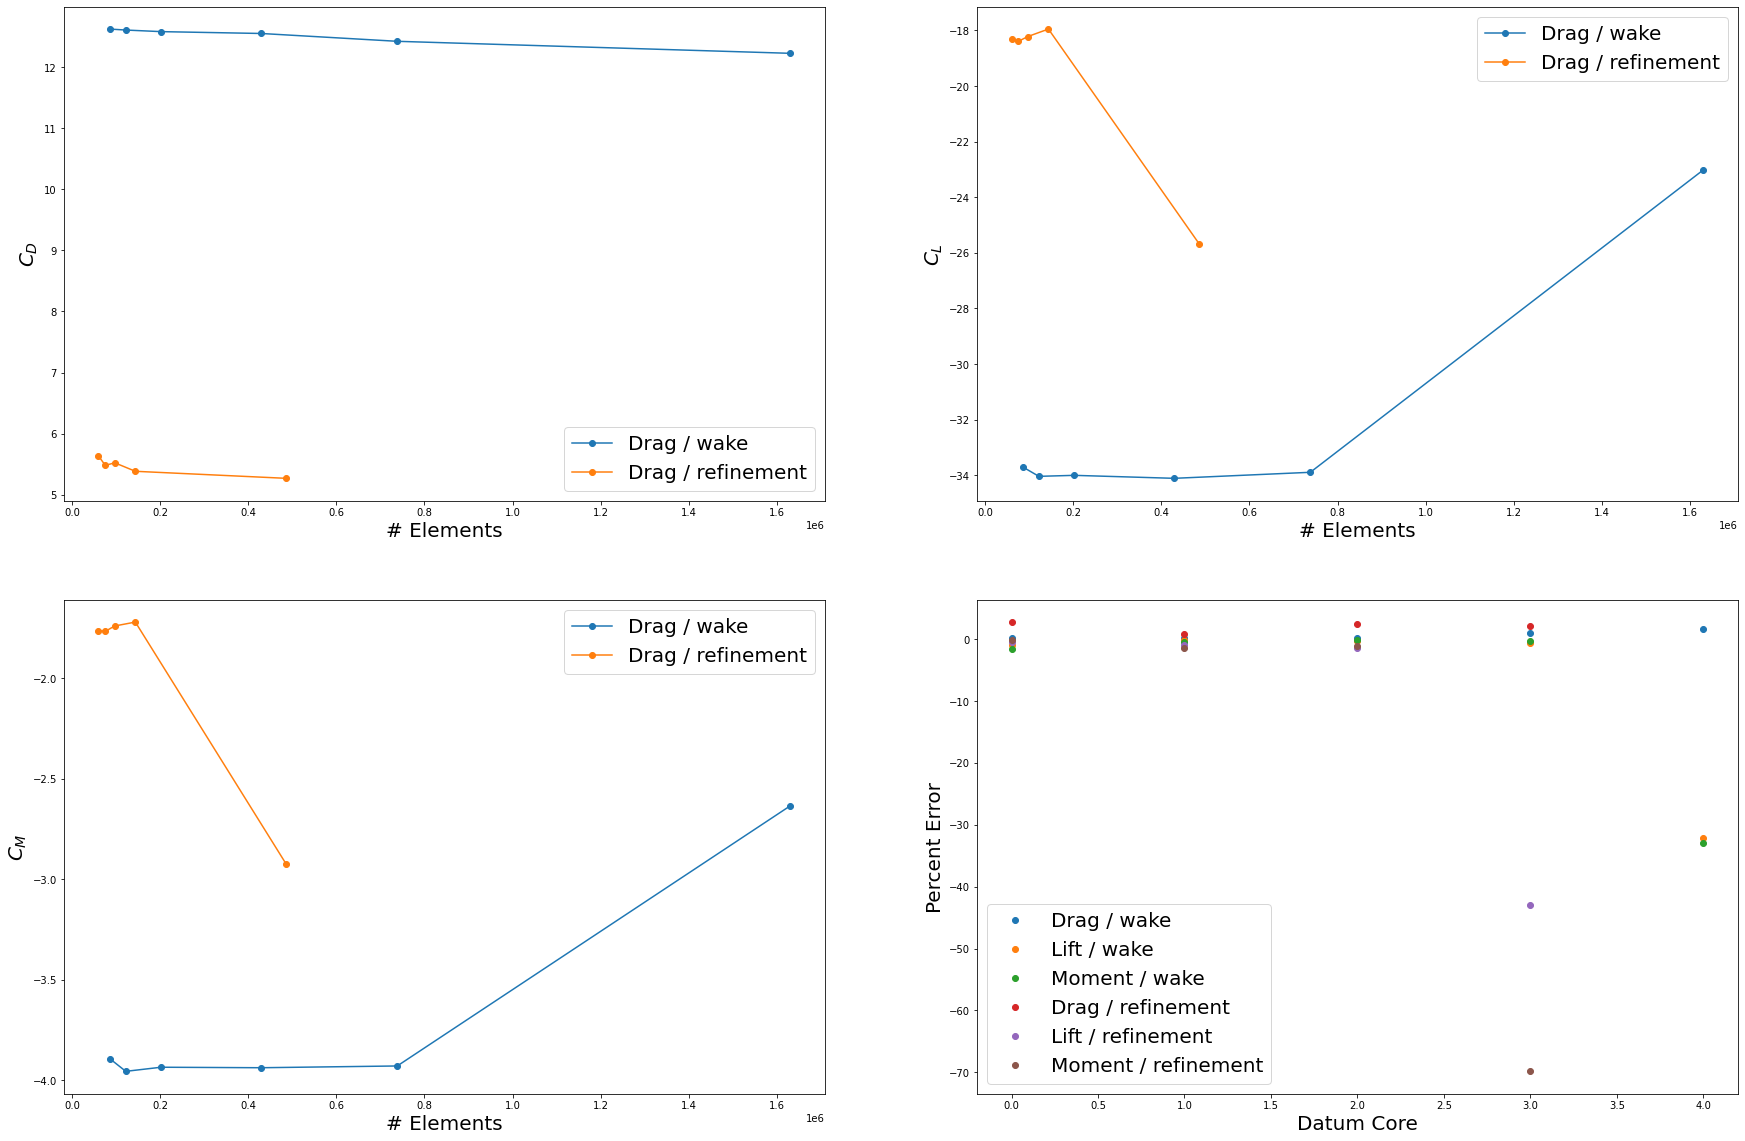

In [9]:
width = 30
fig1, axs1 = plt.subplots(2, 2, figsize=(width, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5)

axs1 = axs1.ravel()

axs1[0].plot(elements, avg_drag, 'o-', label = 'Drag / wake')
axs1[0].plot(Ielements, Iavg_drag, 'o-', label = 'Drag / refinement')
axs1[0].legend(fontsize=20.0)
axs1[0].set_xlabel('# Elements', fontsize=20.0)
axs1[0].set_ylabel('$C_D$', fontsize=20.0)

axs1[1].plot(elements, avg_lift, 'o-', label = 'Drag / wake')
axs1[1].plot(Ielements, Iavg_lift, 'o-', label = 'Drag / refinement')
axs1[1].legend(fontsize=20.0)
axs1[1].set_xlabel('# Elements', fontsize=20.0)
axs1[1].set_ylabel('$C_L$', fontsize=20.0)

axs1[2].plot(elements, avg_moment, 'o-', label = 'Drag / wake')
axs1[2].plot(Ielements, Iavg_moment, 'o-', label = 'Drag / refinement')
axs1[2].legend(fontsize=20.0)
axs1[2].set_xlabel('# Elements', fontsize=20.0)
axs1[2].set_ylabel('$C_M$', fontsize=20.0)

axs1[3].plot(error_drag, 'o', label = 'Drag / wake')
axs1[3].plot(error_lift, 'o', label = 'Lift / wake')
axs1[3].plot(error_moment, 'o', label = 'Moment / wake')
axs1[3].plot(Ierror_drag, 'o', label = 'Drag / refinement')
axs1[3].plot(Ierror_lift, 'o', label = 'Lift / refinement')
axs1[3].plot(Ierror_moment, 'o', label = 'Moment / refinement')
axs1[3].set_ylabel('Percent Error', fontsize=20.0)
axs1[3].set_xlabel('Datum Core', fontsize=20.0)
axs1[3].legend(fontsize=20.0)

plt.savefig('Convergence_study.png', bbox_inches = 'tight')

In [ ]:
d = {}